In [6]:
pip install us

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install census

Note: you may need to restart the kernel to use updated packages.


In [8]:
from census import Census
from us import states
import pandas as pd
from us import states
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

In [9]:
# Import U.S. Census API Key
from config import api_key
if api_key == "YOUR KEY HERE":
    print("Please edit your config.py file.")

# Create an instance of the Census library
c = Census(api_key)
print("Census API instance created successfully")

Census API instance created successfully


In [10]:
json_list = c.acs5.tables()
json_list

[{'name': 'B17015',
  'description': 'Poverty Status in the Past 12 Months of Families by Family Type by Social Security Income by Supplemental Security Income (SSI) and Cash Public Assistance Income',
  'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B17015.json',
  'universe ': 'Families'},
 {'name': 'B18104',
  'description': 'Sex by Age by Cognitive Difficulty',
  'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B18104.json',
  'universe ': 'Civilian noninstitutionalized population 5 years and over'},
 {'name': 'B17016',
  'description': 'Poverty Status in the Past 12 Months of Families by Family Type by Work Experience of Householder and Spouse',
  'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B17016.json',
  'universe ': 'Families'},
 {'name': 'B18105',
  'description': 'Sex by Age by Ambulatory Difficulty',
  'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B18105.json',
  'universe ': 'Civilian noninstitutionalized populat

In [11]:
data = c.acs5.get(
    (
        'NAME',
        "B25039_002E",
        "B25027_010E",
        "B25027_002E",
        "B25088_002E",
        "B25088_003E",
        "B25099_002E",
        "B25099_003E",
        "B19013_001E",
        "B01003_001E",
        "B01002_001E",
        "B19301_001E",
        "B17001_002E",
        "B25077_001E"
    ),
    {'for': 'state:{}'.format(states.AL.fips)}
)

APIKeyError: ' <html style="font-size: 14px;">     <head>         <title>Invalid Key</title>         <link rel="icon" type="image/x-icon" href="favicon.ico">         <link rel="stylesheet" type="text/css" href="assets/styles.css">         <script type="text/javascript" src="assets/jquery-1.4.4.min.js"></script>         <script type="text/javascript">             $(document).ready(function() {                 $(".menu-activator").click(function() {                     $(".gov-menu").toggle()                     $(".chevron").toggleClass(\'rotate\')                 })                             })         </script>     </head>     <body>         <header>             <div data-v-8adc6fed="" data-v-2f72e816="" class="gov-banner noprint">                 <div data-v-8adc6fed="" class="aqua-layout horizontal align-start justify-start banner-header">                     <img data-v-8adc6fed="" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAALCAMAAABBPP0LAAAAG1BMVEUdM7EeNLIeM7HgQCDaPh/bPh/bPx/////bPyBEby41AAAAUElEQVQI123MNw4CABDEwD3jC/9/MQ1BQrgeOSkIqYe2o2FZtthXgQLgbHVMZdlsfUQFQnHtjP1+8BUhBDKOqtmfot6ojqPzR7TjdU+f6vkED+IDPhTBcMAAAAAASUVORK5CYII=" alt="U.S flag" class="usflag" role="img" aria-hidden="true">                     <span data-v-8adc6fed="">                         <div data-v-8adc6fed="" class="aqua-layout horizontal" tabindex="0">                             <div data-v-8adc6fed="" tabindex="0" aria-label="An official website of the United States government">                                  An official website of the United States government                              </div>                             <div data-v-8adc6fed="" class="menu-activator" aria-label="Here\'s how you know. Press enter for more information." tabindex="0">                                 <div data-v-8adc6fed="" class="aqua-layout horizontal justify-start"> Here&rsquo;s how you know <div data-v-8adc6fed="" class="chevron"><img  data-v-8adc6fed="" class="aqua-icon" src="assets/images/chevron-down.svg" style="width: 0.75rem; height: 0.75rem; max-height: 0.75rem; transition: all 500ms ease 0s; filter: invert(30%) sepia(8%) saturate(3837%) hue-rotate(171deg) brightness(99%) contrast(89%);"></div>                                 </div>                             </div>                         </div>                     </span>                 </div>                 <div data-v-8adc6fed="" class="aqua-layout horizontal justify-start gov-menu" style="display: none;"><div data-v-8adc6fed="" class="aqua-layout horizontal justify-start menu-paragraph"><img data-v-8adc6fed="" class="menu-svg" src="assets/images/icon-gov-building.svg" role="img" alt="government building image" aria-hidden="true"><div data-v-8adc6fed="" tabindex="0" aria-label="Official websites use .gov. A .gov website belongs to an official government                 organization in the United States."><strong data-v-8adc6fed=""> Official websites use .gov </strong>                 <br data-v-8adc6fed=""> A <strong data-v-8adc6fed="">.gov</strong> website belongs to an official government organization in the United States. </div>             </div>             <div data-v-8adc6fed="" class="aqua-layout horizontal justify-start menu-paragraph"><img data-v-8adc6fed="" class="menu-svg" src="assets/images/icon-lock.svg" role="img" alt="lock image" aria-hidden="true">                 <div data-v-8adc6fed="" tabindex="0" aria-label="Secure .gov websites use HTTPS. A lock or https:// means youâ\x80\x99ve safely connected to the                 .gov website. Share sensitive information only on official, secure                 websites."><strong data-v-8adc6fed=""> Secure .gov websites use HTTPS </strong>                 <br data-v-8adc6fed=""> A <strong data-v-8adc6fed="">lock</strong> ( <img data-v-8adc6fed="" class="menu-lock" src="assets/images/lock.svg" role="img" alt="lock image" aria-hidden="true"> ) or <strong data-v-8adc6fed="">https://</strong> means you&lsquo;ve safely connected to the .gov website. Share sensitive information only on official, secure websites. </div>             </div>         </div>     </div>     <div data-v-beed8774="" data-v-2f72e816="" role="banner" class="AppHeader noprint" aqua-relative="">         <div data-v-beed8774="" class="aqua-layout horizontal align-center justify-center"><!---->             <div data-v-beed8774="" class="aqua-flex" style="flex: 0 0 auto;">                 <div data-v-beed8774="" class="aqua-layout vertical">                     <div data-v-beed8774="" class="logoArea">                         <a data-v-fb9b02c5="" data-v-beed8774="" href="/" class="" id="census-home-link">                             <div data-v-fb9b02c5="" style="display: none;"></div>                             <img data-v-beed8774="" class="header-logo" src="assets/images/census-logo-gray.svg" alt="United States Census Bureau - Census Data Homepage">                         </a>                     </div>                 </div>             </div><!----><!---->             <div data-v-beed8774="" class="aqua-layout vertical"></div>         </div>     </div> </div> </header> <div class="flex-container content">     <div class="content-wrap center">         <h1>Invalid Key</h1>         <p>             A valid <em>key</em> must be included with each data API request.             You included a key with this request, however, it is not valid.             Please check your key and try again.         </p>         <p>             If you do not have a key you may sign up for one <a href="key_signup.html">here</a>.         </p>     </div>       </div>  <div data-v-56f1d3f7="" class="aqua-flex" style="flex: 0 0 auto;">     <footer data-v-db923c0a="" data-v-56f1d3f7="" class="PageFooter">         <div data-v-db923c0a="" class="aqua-layout align-center justify-center links aqua-text-caption">             <a data-v-db923c0a="" target="_blank" href="https://www.census.gov/about/policies/section-508.html">Accessibility</a>             <span data-v-db923c0a="" aria-hidden="true">&nbsp;|&nbsp;</span>             <a data-v-db923c0a="" target="_blank" href="https://www.census.gov/quality/">Information Quality</a>             <span data-v-db923c0a="" aria-hidden="true">&nbsp;|&nbsp;</span>             <a data-v-db923c0a="" target="_blank" href="https://www.census.gov/foia/">FOIA</a>             <span data-v-db923c0a="" aria-hidden="true">&nbsp;|&nbsp;</span>             <a data-v-db923c0a="" target="_blank" href="https://www.census.gov/privacy/">Data Protection and Privacy Policy</a>             <span data-v-db923c0a="" aria-hidden="true">&nbsp;|&nbsp;</span>             <a data-v-db923c0a="" target="_blank" href="https://www.commerce.gov/">U.S. Department of Commerce</a>             <span data-v-db923c0a="" aria-hidden="true">&nbsp;|&nbsp;</span>             <a data-v-db923c0a="" target="_blank" href="https://www2.census.gov/data/api-documentation/data-census-gov-release-notes.pdf?#">Release Notes</a>         </div>     </footer> </div>       </body> </html>'

In [7]:
region_states = [
    'OH',
    'IN',
    'IL',
    'MI',
    'WI',
    'MN',
    'IA',
    'MS',
    'ND',
    'SD',
    'NE',
    'KS'
]
data_years = [
    2018,
    2019,
    2020,
    2021,
    2022
]
   

In [8]:
c.acs5.state(
    (
        'NAME',
        "B25039_002E",
        "B25027_010E",
        "B25027_002E",
        "B25088_002E",
        "B25088_003E",
        "B25099_002E",
        "B25099_003E",
        "B19013_001E",
        "B01003_001E",
        "B01002_001E",
        "B19301_001E",
        "B17001_002E",
        "B25077_001E",
        ), states.AL.fips, year=2018)

[{'NAME': 'Alabama',
  'B25039_002E': 2003.0,
  'B25027_010E': 552580.0,
  'B25027_002E': 722643.0,
  'B25088_002E': 1174.0,
  'B25088_003E': 358.0,
  'B25099_002E': 75400.0,
  'B25099_003E': 42890.0,
  'B19013_001E': 48486.0,
  'B01003_001E': 4864680.0,
  'B01002_001E': 38.9,
  'B19301_001E': 26846.0,
  'B17001_002E': 829400.0,
  'B25077_001E': 137200.0,
  'state': '01'}]

In [9]:
census_data = []
for data_year in data_years:
    for state in region_states:
        state_data = c.acs5.get(
            (
                'NAME',
                "B25039_002E",
                "B25027_010E",
                "B25027_002E",
                "B25088_001E",
                "B25088_002E",
                "B25088_003E",
                "B25099_002E",
                "B25099_003E",
                "B19013_001E",
                "B01003_001E",
                "B01002_001E",
                "B19301_001E",
                "B17001_002E",
                "B25077_001E"
            ),
            {'for': 'state:{}'.format(states.lookup(state).fips)},
            year=data_year
        )[0]
        state_data["Year"] = data_year
        census_data.append(state_data)
census_data

[{'NAME': 'Ohio',
  'B25039_002E': 2002.0,
  'B25027_010E': 1126792.0,
  'B25027_002E': 1944435.0,
  'B25088_001E': 946.0,
  'B25088_002E': 1269.0,
  'B25088_003E': 471.0,
  'B25099_002E': 82178.0,
  'B25099_003E': 49920.0,
  'B19013_001E': 54533.0,
  'B01003_001E': 11641879.0,
  'B01002_001E': 39.3,
  'B19301_001E': 30304.0,
  'B17001_002E': 1645986.0,
  'B25077_001E': 140000.0,
  'state': '39',
  'Year': 2018},
 {'NAME': 'Indiana',
  'B25039_002E': 2003.0,
  'B25027_010E': 601938.0,
  'B25027_002E': 1158794.0,
  'B25088_001E': 869.0,
  'B25088_002E': 1130.0,
  'B25088_003E': 401.0,
  'B25099_002E': 77244.0,
  'B25099_003E': 49471.0,
  'B19013_001E': 54325.0,
  'B01003_001E': 6637426.0,
  'B01002_001E': 37.6,
  'B19301_001E': 28461.0,
  'B17001_002E': 908359.0,
  'B25077_001E': 135400.0,
  'state': '18',
  'Year': 2018},
 {'NAME': 'Illinois',
  'B25039_002E': 2003.0,
  'B25027_010E': 1154929.0,
  'B25027_002E': 2034106.0,
  'B25088_001E': 1218.0,
  'B25088_002E': 1668.0,
  'B25088_003

In [10]:
# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column renaming
census_pd = census_pd.rename(
    columns = {
        "B25039_002E": "Median Year Moved In",
        "B25027_010E": "Total Housing without Mortgage",
        "B25027_002E": "Total Housing with Mortgage",
        "B25088_002E": "Median Monthly Costs with Mortgage",
        "B25088_003E": "Median Monthly Costs without Mortgage", 
        "B25099_002E": "Median Household Income with Mortgage",
        "B25099_003E": "Median Household Income without Mortgage",
        "B01003_001E": "Population",
        "B01002_001E": "Median Age",
        "B19013_001E": "Household Income",
        "B19301_001E": "Per Capita Income",
        "B17001_002E": "Poverty Count",
        "B25077_001E": "Median Home Value",
        "NAME": "State"
    }
)

In [11]:
# Add a Poverty Rate column (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * census_pd["Poverty Count"].astype(int) / census_pd["Population"].astype(int)

# Configure the final DataFrame
census_pd = census_pd[
    [
        "State",
        "Year",
        "Population",
        "Median Age",
        "Median Year Moved In",
        "Median Home Value",
        "Total Housing with Mortgage",
        "Total Housing without Mortgage",
        "Median Monthly Costs with Mortgage",
        "Median Monthly Costs without Mortgage",
        "Household Income",
        "Per Capita Income", 
        "Median Household Income with Mortgage",
        "Median Household Income without Mortgage",
        "Poverty Count",
        "Poverty Rate"
    ]
]

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(census_pd)}")
census_pd.head()

Number of rows in the DataFrame: 60


,State,Year,Population,Median Age,Median Year Moved In,Median Home Value,Total Housing with Mortgage,Total Housing without Mortgage,Median Monthly Costs with Mortgage,Median Monthly Costs without Mortgage,Household Income,Per Capita Income,Median Household Income with Mortgage,Median Household Income without Mortgage,Poverty Count,Poverty Rate
0,Ohio,2018,11641879.0,39.3,2002.0,140000.0,1944435.0,1126792.0,1269.0,471.0,54533.0,30304.0,82178.0,49920.0,1645986.0,14.138491
1,Indiana,2018,6637426.0,37.6,2003.0,135400.0,1158794.0,601938.0,1130.0,401.0,54325.0,28461.0,77244.0,49471.0,908359.0,13.685411
2,Illinois,2018,12821497.0,37.9,2003.0,187200.0,2034106.0,1154929.0,1668.0,626.0,63575.0,34463.0,93876.0,57899.0,1635603.0,12.756724
3,Michigan,2018,9957488.0,39.7,2003.0,146200.0,1681021.0,1096093.0,1279.0,484.0,54938.0,30336.0,80982.0,48491.0,1457008.0,14.632285
4,Wisconsin,2018,5778394.0,39.3,2003.0,173600.0,1008935.0,559105.0,1418.0,550.0,59209.0,32018.0,85828.0,53875.0,668220.0,11.564113


In [12]:
# Save the DataFrame as a CSV
# Note: To avoid any issues later, use encoding="utf-8"
census_pd.to_csv("midwest_data.csv", encoding="utf-8", index=False)

In [13]:
# Add the columns to get the total number of owned homes
census_pd["Total Owned Homes"] = census_pd["Total Housing with Mortgage"] + census_pd["Total Housing without Mortgage"]

# Calculate the home ownership rate
census_pd["Home Ownership Rate"] = 100 * census_pd["Total Owned Homes"].astype(int) / census_pd["Population"].astype(int)

# Group by year and calculate the mean home ownership rate for each year, and rename it
yearly_ownership_rate = census_pd.groupby("Year")["Home Ownership Rate"].mean()
yearly_ownership_rate.head()

Year
2018    26.634465
2019    26.718130
2020    26.992892
2021    26.944992
2022    27.226665
Name: Home Ownership Rate, dtype: float64

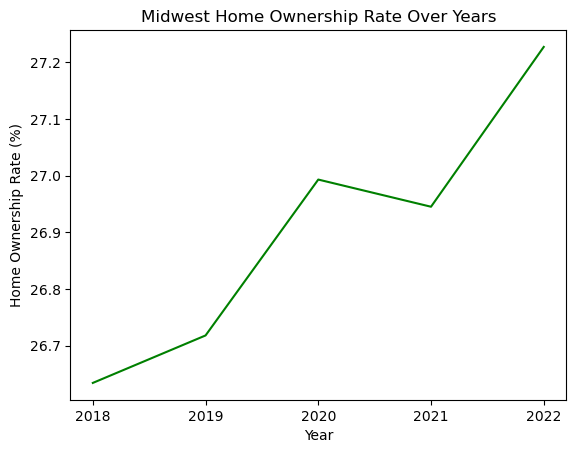

In [14]:
# Plot the home ownership rate over the years
plt.plot(yearly_ownership_rate.index, yearly_ownership_rate.values, linestyle='-', color='g')
plt.title('Midwest Home Ownership Rate Over Years')
plt.xlabel('Year')
plt.xticks(ticks=[2018, 2019, 2020, 2021, 2022])
plt.ylabel('Home Ownership Rate (%)')
plt.show()

In [15]:
labels = []
medians = []
for data_year in data_years:
    labels.append(str(data_year))
    medians.append(census_pd.loc[census_pd["Year"] == data_year]["Household Income"].median())

medians

[58001.0, 60060.0, 61463.5, 64975.0, 70159.0]

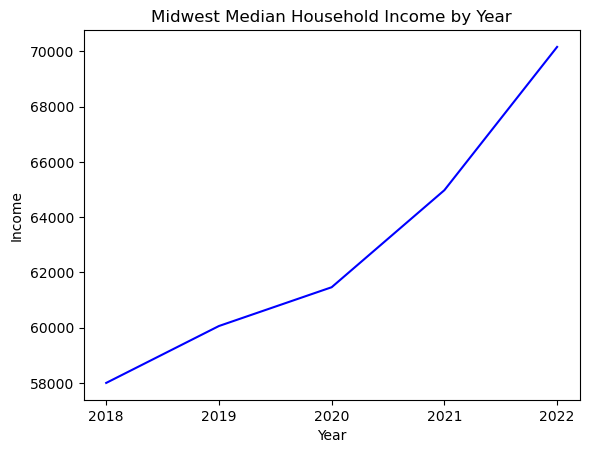

In [16]:
plt.plot(labels, medians, "b-")

# Incorporate the other graph properties
plt.title('Midwest Median Household Income by Year')
plt.xlabel('Year')
plt.ylabel('Income')

# Show plot
plt.show()

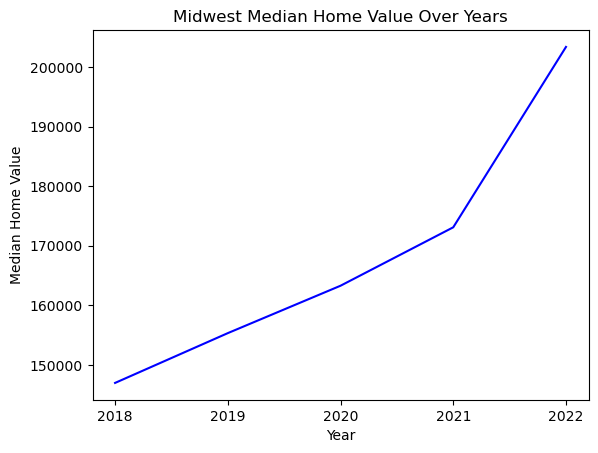

In [17]:
# Filter the data to get median home values over the years
years = census_pd["Year"].unique()
median_home_values = []

for year in years:
    median_value = census_pd.loc[census_pd["Year"] == year]["Median Home Value"].median()
    median_home_values.append(median_value)

# Create the plot
# plt.figure(figsize=(10, 6))
plt.plot(years, median_home_values, linestyle='-', color='b')
plt.title('Midwest Median Home Value Over Years')
plt.xlabel('Year')
plt.xticks(ticks=[2018, 2019, 2020, 2021, 2022])
plt.ylabel('Median Home Value')

# Show the plot
plt.show()

In [18]:
census_pd[["Median Home Value", "Median Monthly Costs with Mortgage"]].describe()

,Median Home Value,Median Monthly Costs with Mortgage
count,60.000000,60.000000
mean,176988.333333,1417.383333
std,34751.017991,178.739474
min,114500.000000,1130.000000
25%,151300.000000,1295.000000
50%,172850.000000,1394.500000
75%,200025.000000,1529.750000
max,286800.000000,1903.000000


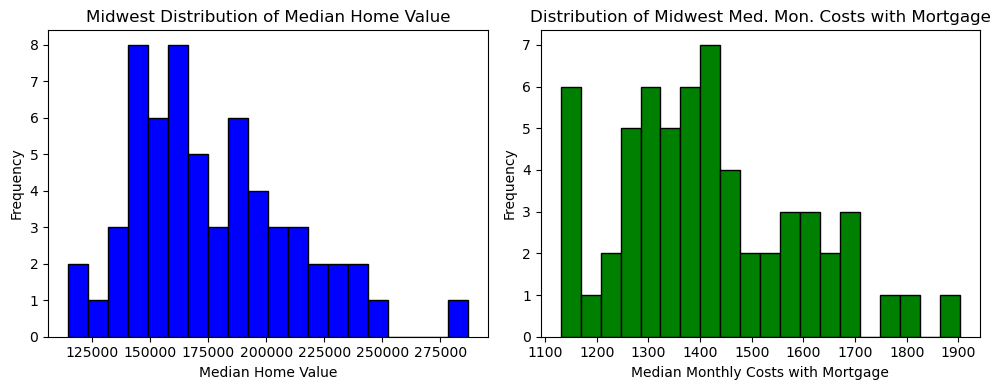

In [20]:
plt.figure(figsize=(10, 4))

# Histogram for Median Home Value
plt.subplot(1, 2, 1)
plt.hist(census_pd["Median Home Value"], bins=20, color='blue', edgecolor='black')
plt.title('Midwest Distribution of Median Home Value')
plt.xlabel('Median Home Value')
plt.ylabel('Frequency')

# Histogram for Median Monthly Costs with Mortgage
plt.subplot(1, 2, 2)
plt.hist(census_pd["Median Monthly Costs with Mortgage"], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Midwest Med. Mon. Costs with Mortgage')
plt.xlabel('Median Monthly Costs with Mortgage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

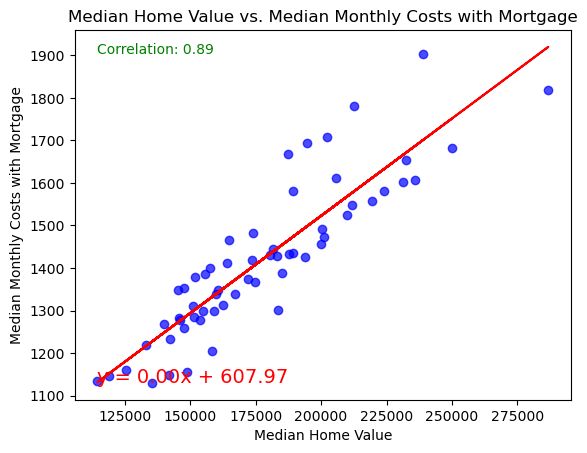

In [23]:
# Extract the relevant columns for the scatter plot
home_values = census_pd["Median Home Value"]
costs_with_mortgage = census_pd["Median Monthly Costs with Mortgage"]

# Calculate Pearson correlation, Perform linear regression calculate regression line.
correlation = st.pearsonr(home_values, costs_with_mortgage)
slope, intercept, r_value, p_value, std_err = st.linregress(home_values, costs_with_mortgage)
regression_line = slope * home_values + intercept

# Apply the regression line
plt.plot(home_values, regression_line, "r-", label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.text(min(home_values), max(costs_with_mortgage), f'Correlation: {correlation[0]:.2f}', color='green')

# Add regression equation 
equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(home_values.min(), costs_with_mortgage.min(), equation_text, fontsize=14, color="red")

# Create the scatter plot
plt.scatter(home_values, costs_with_mortgage, alpha=0.7, color='b')
plt.title('Median Home Value vs. Median Monthly Costs with Mortgage')
plt.xlabel('Median Home Value')
plt.ylabel('Median Monthly Costs with Mortgage')

# Show the plot
plt.show()

In [24]:
census_pd[["Median Home Value", "Median Monthly Costs without Mortgage"]].describe()

,Median Home Value,Median Monthly Costs without Mortgage
count,60.000000,60.000000
mean,176988.333333,516.666667
std,34751.017991,78.825632
min,114500.000000,357.000000
25%,151300.000000,476.750000
50%,172850.000000,513.500000
75%,200025.000000,558.250000
max,286800.000000,737.000000


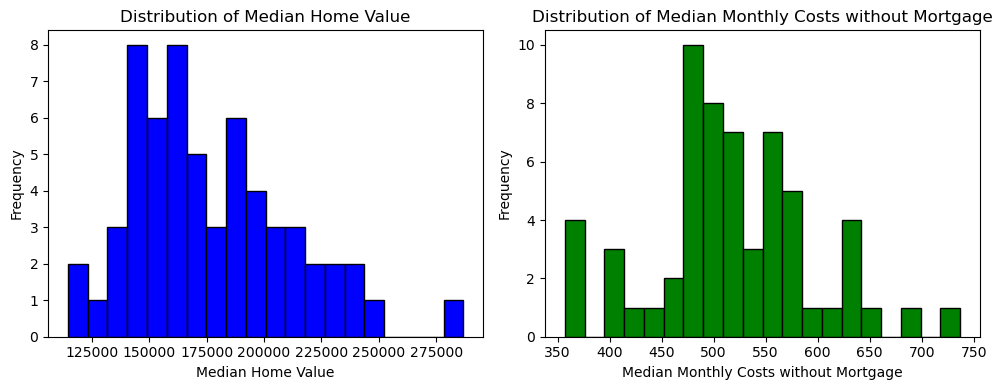

In [27]:
costs_without_mortgage = census_pd["Median Monthly Costs without Mortgage"]

plt.figure(figsize=(10, 4))

# Histogram for Median Home Value
plt.subplot(1, 2, 1)
plt.hist(home_values, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Median Home Value')
plt.xlabel('Median Home Value')
plt.ylabel('Frequency')

# Histogram for Median Monthly Costs without Mortgage
plt.subplot(1, 2, 2)
plt.hist(costs_without_mortgage, bins=20, color='green', edgecolor='black')
plt.title('Distribution of Median Monthly Costs without Mortgage')
plt.xlabel('Median Monthly Costs without Mortgage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [33]:
def regressValues(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    return regress_values

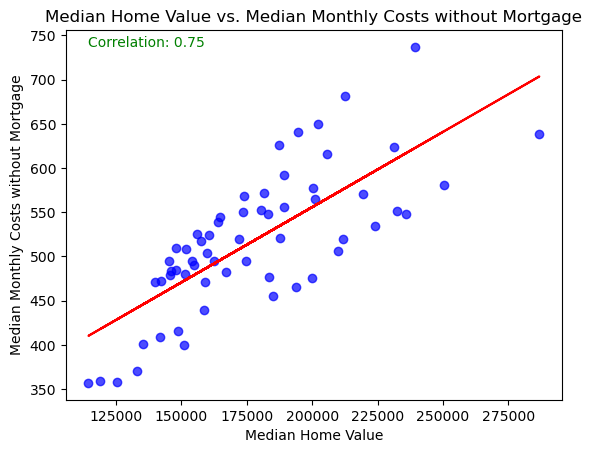

In [34]:
# Extract the relevant columns for the scatter plot
home_values = census_pd["Median Home Value"]
costs_without_mortgage = census_pd["Median Monthly Costs without Mortgage"]

correlation = st.pearsonr(home_values, costs_without_mortgage)
slope, intercept, r_value, p_value, std_err = st.linregress(home_values, costs_without_mortgage)
regression_line = slope * home_values + intercept

# Apply the regression line
plt.plot(home_values, regression_line, "r-", label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.text(min(home_values), max(costs_without_mortgage), f'Correlation: {correlation[0]:.2f}', color='green')

# Create the scatter plot
plt.scatter(home_values, costs_without_mortgage, alpha=0.7, color='b')
plt.title('Median Home Value vs. Median Monthly Costs without Mortgage')
plt.xlabel('Median Home Value')
plt.ylabel('Median Monthly Costs without Mortgage')

# Show the plot
plt.show()

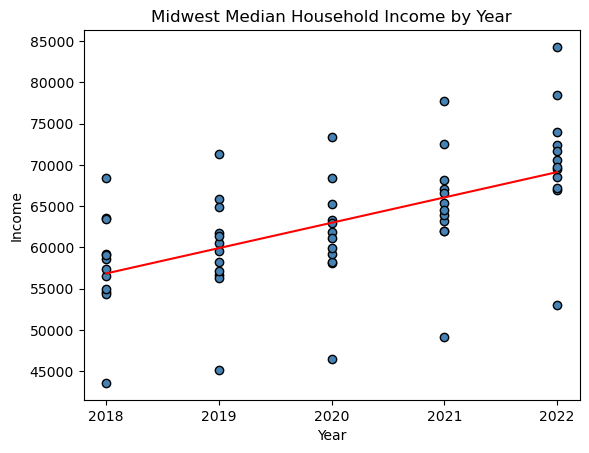

In [35]:
plt.plot(census_pd["Year"], regressValues(census_pd["Year"], census_pd["Household Income"]),"r-")
plt.scatter(census_pd["Year"], census_pd["Household Income"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('Midwest Median Household Income by Year')
plt.xlabel('Year')
plt.xticks(ticks=[2018, 2019, 2020, 2021, 2022])
plt.ylabel('Income')

# Show plot
plt.show()

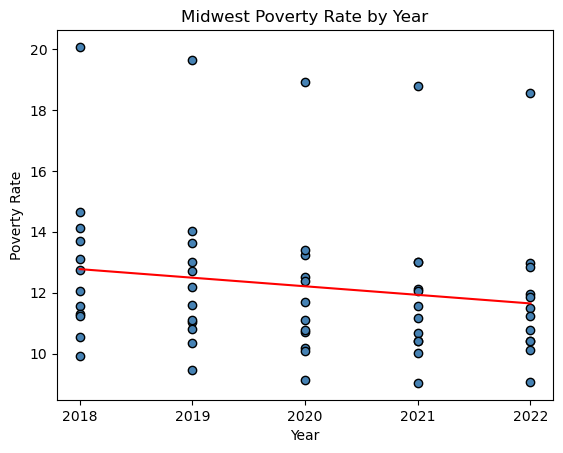

In [36]:
plt.plot(census_pd["Year"], regressValues(census_pd["Year"], census_pd["Poverty Rate"]),"r-")
plt.scatter(census_pd["Year"], census_pd["Poverty Rate"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('Midwest Poverty Rate by Year')
plt.xticks(ticks=[2018, 2019, 2020, 2021, 2022])
plt.xlabel('Year')
plt.ylabel('Poverty Rate')

# Show plot
plt.show()

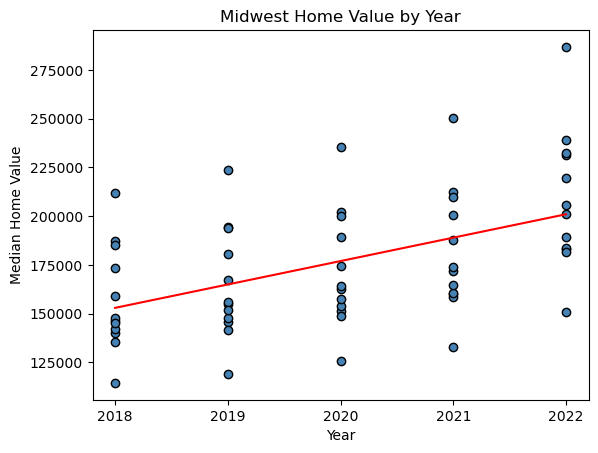

In [37]:
plt.plot(census_pd["Year"], regressValues(census_pd["Year"], census_pd["Median Home Value"]),"r-")
plt.scatter(census_pd["Year"], census_pd["Median Home Value"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('Midwest Home Value by Year')
plt.xticks(ticks=[2018, 2019, 2020, 2021, 2022])
plt.xlabel('Year')
plt.ylabel('Median Home Value')

# Show plot
plt.show()

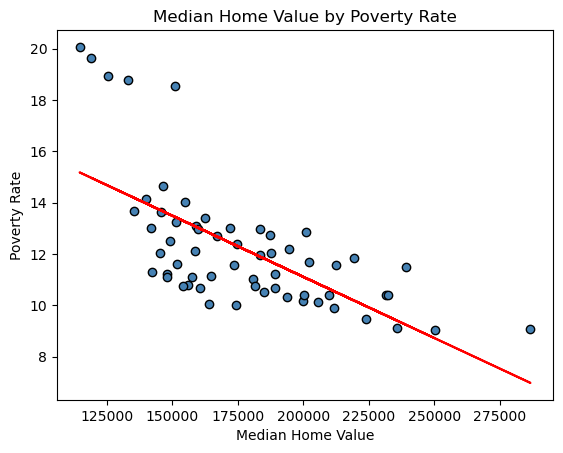

In [40]:
plt.plot(census_pd["Median Home Value"], regressValues(census_pd["Median Home Value"], census_pd["Poverty Rate"]),"r-")
plt.scatter(census_pd["Median Home Value"], census_pd["Poverty Rate"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('Median Home Value by Poverty Rate')
plt.xlabel('Median Home Value')
plt.ylabel('Poverty Rate')

# Show plot
plt.show()